# Data Cleaning: Missing Data

lets install datawig for the deep learnng preprocessing 

In [8]:
pip install datawig

Note: you may need to restart the kernel to use updated packages.


In [141]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read the data
df = pd.read_csv(r'C:\Users\valer\OneDrive\Desktop\Python\titanic_train.csv')

In [142]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)
print()
print('Numeric columns:')
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
print()
print('Non-numeric columns:')
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

print()
print()
def non_numeric(df):
    '''
    Takes df
    Checks nulls
    '''
    df_numeric = df.select_dtypes(include=[np.number])
    
    if df_numeric.isnull().sum().sum() > 0:
        mask_total_numeric = df_numeric.isnull().sum().sort_values(ascending=False) 
        total = mask_total_numeric[mask_total_numeric > 0]

        mask_percent = df_numeric.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data_numeric = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(missing_data_numeric)
    else: 
        print('No NaN found in numeric.')
        
def numeric(df):
    '''
    Takes df
    Checks nulls
    '''
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    
    if df_non_numeric.isnull().sum().sum() > 0:
        mask_total_non_numeric = df_non_numeric.isnull().sum().sort_values(ascending=False) 
        total = mask_total_non_numeric[mask_total_non_numeric > 0]

        mask_percent = df_non_numeric.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data_non_numeric = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(missing_data_non_numeric)
    else: 
        print('No NaN found in numeric.')

print('Total and Percentage of NaN in numeric:\n')
non_numeric(df)
print()
print()
print()
print('Total and Percentage of NaN in non numeric:\n')
numeric(df)

(891, 12)
PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Numeric columns:
['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']

Non-numeric columns:
['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


Total and Percentage of NaN in numeric:

        Total   Percent
Age       177  0.198653
Fare      109  0.122334
Pclass     74  0.083053
Parch      45  0.050505



Total and Percentage of NaN in non numeric:

          Total   Percent
Cabin       687  0.771044
Embarked    145  0.162738
Ticket      124  0.139169
Sex         115  0.129068


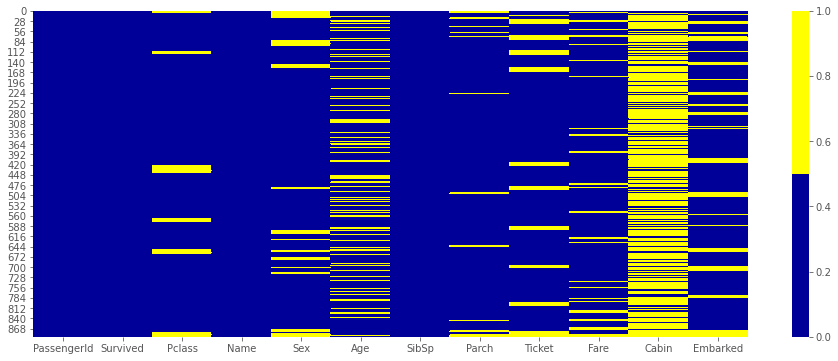

In [143]:
cols = df.columns # first 30 columns
plt.figure(figsize=(16, 6))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

As a rule of thumb, when the data goes missing on 60–70 percent of the variable, dropping the variable should be considered

In [144]:
for column in df.columns:
    if df[column].isnull().sum()/df.shape[0] > 0.70:
        df.drop(columns=[column], axis = 1, inplace = True)

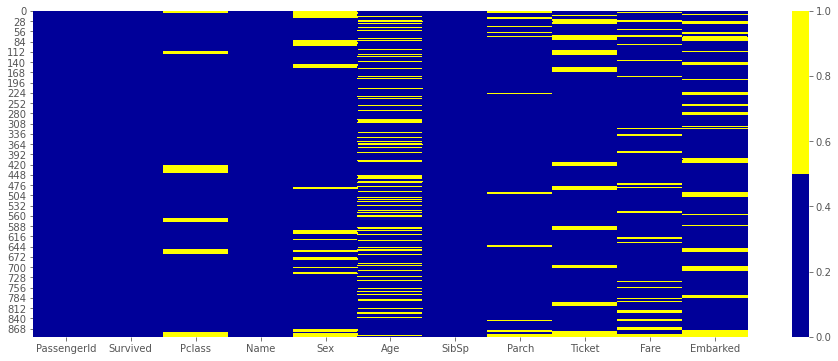

In [145]:
cols = df.columns # first 30 columns
plt.figure(figsize=(16, 6))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# The Missing Data Classification

1. Missing Completely at Random, MCAR, means there is no relationship between the missingness of the data and any values, observed or missing. Those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than others.

2. Missing at Random, MAR, means there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data. Whether an observation is missing has nothing to do with the missing values, but it does have to do with the values of an individual’s observed variables. So, for example, if men are more likely to tell you their weight than women, weight is MAR.

3. Missing Not at Random, MNAR, means there is a relationship between the propensity of a value to be missing and its values. This is a case where the people with the lowest education are missing on education or the sickest people are most likely to drop out of the study. MNAR is called “non-ignorable” because the missing data mechanism itself has to be modeled as you deal with the missing data. You have to include some model for why the data are missing and what the likely values are.

“Missing Completely at Random” and “Missing at Random” are both considered ‘ignorable’ because we don’t have to include any information about the missing data itself when we deal with the missing data.
https://www.theanalysisfactor.com/missing-data-mechanism/





# Missing data imputations


Questions to be answered:
Do missing data is valuable?

1. Drop rows and/or columns with missing data. If the missing data is not valuable, just drop the rows (i.e. specific customers, sensor reading, or other individual exemplars) from your analysis. If entire columns are filled with missing data, drop them as well. There is no need to analyze the column “Quantity of NewAwesomeProduct Bought” if no one has bought it yet.
2. Recode missing data into a different format. Numerical computations can break down with missing data. Recoding missing values into a different column saves the day. For example, the column “payment_date” with empty rows can be recoded into a column “payed_yet” with 0 for “no” and 1 for “yes”. (https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

3. Handling categorical features
4. Handling numerical features

# Handling missing categorical features

In [146]:
#1. Handling categorical features_most frequent value

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

lst = []
missing_columns = []
for column in df_non_numeric.columns:
    if df_non_numeric[column].isnull().sum() > 0:
        missing_columns.append(column)
        
df_non_numeric = df.select_dtypes(exclude=[np.number])

df_non_numeric = df.select_dtypes(exclude=[np.number])
#df_non_numeric.drop('Name', axis = 1, inplace = True)
for column in missing_columns:
    most_freq_feature = df_non_numeric[column].value_counts(ascending = False).index[0]
    lst.append(most_freq_feature)
features = missing_columns

df1 = pd.DataFrame(lst,features, columns = ['Max_Count'])

def impute_nan(df):
    for column in missing_columns:
        most_frequent_category = df[column].value_counts().index[0]
        df[column].fillna(most_frequent_category, inplace=True)
    return df

df_most_freq = impute_nan(df_non_numeric)

# Advantages:
# Easy to implement

# Disadvantages:
# Distortion of the most frequent variable




#2. Adding a Variable To Capture NAN

# Create a new column and replace 1 if the category is NAN else 0. 
# Replace NAN value with most occurred category in the actual column.

# Function to impute most occured category and add importance vairable
def impute_nan_add_vairable(df_non_numeric):
    
    df_new_cat_variable = df_non_numeric.copy()
    for column in df_new_cat_variable.columns:
    
        # add new column and replace if category is null then 1 else 0
        df_new_cat_variable[column + 'newvar_cat'] = np.where(df_new_cat_variable[column].isnull(),1,0)
    
        # Take most occured category in that vairable (.mode())
        Mode_Category = df_new_cat_variable[column].mode()[0]
    
        # Replace NAN values with most occured category in actual vairable
        df_new_cat_variable[column].fillna(Mode_Category,inplace=True)
        
    return df_new_cat_variable

# Advantages: 
# Capture the importance of missingness.

# Disadvantages: 
# Creating Additional Features(Curse of Dimensionality)



#3. Handling categorical features_replacing NAN with new category
df_new_cat = df_non_numeric.copy()
for column in df_new_cat.columns:
    df_new_cat[column + 'newvar'] = np.where(df_new_cat[column].isnull(), 'Missing', df_new_cat[column])

# Advantages:
# easy to implement, preserves the variance.

# Disadvantages:
# result in random data if the missing category a lot. Do not use  when missing data is a high percentage of the data.



#4. Target Guided Ordinal Encoding
df = pd.read_csv(r"C:\Users\valer\OneDrive\Desktop\Python\titanic_train.csv", usecols=['Cabin','Survived'])
df['Cabin'].fillna('Missing', inplace = True)
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.Cabin.unique()
df.groupby(['Cabin'])['Survived'].mean()
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels2 = {k:v for v,k in enumerate(ordinal_labels)}
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)


#5. Mean Encoding
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)



#6. Count Or Frequency Encoding
cabin_map=df['Cabin'].value_counts().to_dict()
cabin_map

df['Cabin_ok']=df['Cabin'].map(cabin_map)


# Label encoder
from sklearn.preprocessing import LabelEncoder
df['Cabin'].fillna('U0', inplace=True)
df['CabinSection'] = LabelEncoder().fit_transform(df['Cabin'].map(lambda x: x[0]))


# Handling missing numerical features

In [147]:
df = pd.read_csv(r"C:\Users\valer\OneDrive\Desktop\Python\train.csv", usecols=['Age','Pclass', 'SibSp', 'Sex', 'Survived'])
df.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [148]:

#dropping columns
def drop_nan(df, variable):
    df[variable+'_dropped'] = df[variable].dropna()
    return df


# mean imputation
def impute_nan_mean(df, variable):
    mean = df.Age.mean()
    df[variable+'_median'] = df[variable].fillna(mean)
    return df


# mode imputation
def impute_nan_mode(df, variable):
    mode = df.Age.mode()
    df[variable+'_median'] = df[variable].fillna(mode)
    return df



# median imputation
def impute_nan_median(df, variable):
    median = df.Age.median()
    df[variable+'_median'] = df[variable].fillna(median)
    return df

# Random sample imputation peaks random data to replace the nan values applied for MCAR
def impute_nan_random(df,variable):
    median = df.Age.median()
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    variable = df['Age']
    return df

# KNN imputation
def impute_KNN(df):
    from sklearn.impute import KNNImputer
    knn_imputer = KNNImputer(n_neighbors=3)
    inputt = df['Age'].values.reshape(-1,1)
    knn_imputer.fit(inputt)
    knn_imputer.transform(inputt)
    df['Age_KNN'] = inputt 
    return df

# group by Sex and Class
def impute_by_Sex_and_Pclass(df):
    grouped = df.groupby(['Sex','Pclass'])  
    # view the median Age by the grouped features 
    grouped.Age.median()
    # apply the grouped median value on the Age NaN
    df['Age_Sex_Pclass'] = grouped.Age.apply(lambda x: x.fillna(x.median()))
    #df7['Age_median_alternative'] = df7['Age'].fillna(df7.groupby('Pclass')['Age'].transform('median'))
    return df

# group by Sex and Class
def impute_by_Pclass(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    return Age

# regression_imputer
def Regression_Age(df):
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    reg_imputer = IterativeImputer(max_iter=10, random_state=123)
    vals = df['Age'].values.reshape(-1,1)
    reg_imputer.fit(vals)
    df['Age_regression'] = reg_imputer.transform(vals)
    return df


# group by Age and Survived
def impute_by_Age_and_Survived(df):
    grouped = df.groupby(['Age','Survived'])  
    # view the median Age by the grouped features 
    grouped.Age.median()
    df['Age_Survived'] = df['Age'].fillna(df.groupby('Survived')['Age'].transform('median'))
    return df

# group by Age and Sex
def impute_by_Age_and_Sex(df):
    grouped = df.groupby(['Age','Survived'])  
    # view the median Age by the grouped features 
    grouped.Age.median()
    df['Age_Sex'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))
    return df

def impute_Age_by_extreme_Age_values(df):
    extreme = df.Age.mean() + 3*df.Age.std()
    df['Age_extreme'] = df['Age'].fillna(extreme)
    return df

def impute_Age_Datawig(df):
    import datawig

    #Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=['Pclass','SibSp'], # column(s) containing information about the column we want to impute
        output_column= 'Age', # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
    )

    #Fit an imputer model on the train data
    imputer.fit(train_df=df, num_epochs=5)

    #Impute missing values and return original dataframe with predictions
    df = imputer.predict(df)
    
    return df

In [149]:


drop_nan(df, 'Age')
impute_nan_median(df, 'Age')
impute_nan_random(df,'Age')
impute_KNN(df)
impute_by_Sex_and_Pclass(df)
df['Age_Pclass']=df[['Age','Pclass']].apply(impute_by_Pclass,axis=1)
Regression_Age(df)
impute_by_Age_and_Sex(df)
impute_by_Age_and_Survived(df)
impute_Age_by_extreme_Age_values(df)
df = impute_Age_Datawig(df)

In [150]:
df

,Survived,Pclass,Sex,Age,SibSp,Age_dropped,Age_median,Age_random,Age_KNN,Age_Sex_Pclass,Age_Pclass,Age_regression,Age_Sex,Age_Survived,Age_extreme,Age_imputed
0,0,3,male,22.0,1,22.0,22.0,22.0,22.0,22.0,22.0,22.000000,22.0,22.0,22.00000,25.412081
1,1,1,female,38.0,1,38.0,38.0,38.0,38.0,38.0,38.0,38.000000,38.0,38.0,38.00000,39.852039
2,1,3,female,26.0,0,26.0,26.0,26.0,26.0,26.0,26.0,26.000000,26.0,26.0,26.00000,28.652479
3,1,1,female,35.0,1,35.0,35.0,35.0,35.0,35.0,35.0,35.000000,35.0,35.0,35.00000,39.852039
4,0,3,male,35.0,0,35.0,35.0,35.0,35.0,35.0,35.0,35.000000,35.0,35.0,35.00000,28.652479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,27.0,27.0,27.0,27.0,27.0,27.0,27.000000,27.0,27.0,27.00000,32.646312
887,1,1,female,19.0,0,19.0,19.0,19.0,19.0,19.0,19.0,19.000000,19.0,19.0,19.00000,40.694926
888,0,3,female,NaN,1,NaN,28.0,15.0,NaN,21.5,24.0,29.699118,27.0,28.0,73.27861,25.412081
889,1,1,male,26.0,0,26.0,26.0,26.0,26.0,26.0,26.0,26.000000,26.0,26.0,26.00000,40.694926


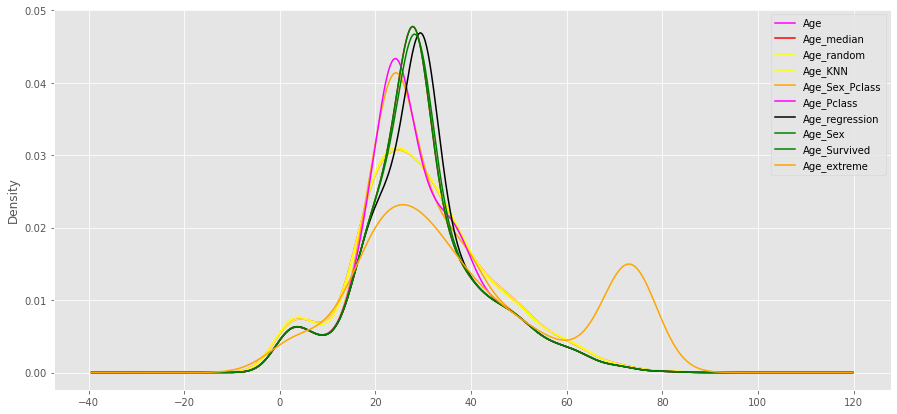

In [151]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color = 'magenta')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='yellow')
df['Age_KNN'].plot(kind='kde', ax=ax, color='yellow')
df['Age_Sex_Pclass'].plot(kind='kde', ax=ax, color='orange')
df.Age_Pclass.plot(kind='kde', ax=ax, color='magenta')

df.Age_regression.plot(kind='kde', ax=ax, color='black')
df.Age_Sex.plot(kind='kde', ax=ax, color='green')
df.Age_Survived.plot(kind='kde', ax=ax, color='green')

df.Age_extreme.plot(kind='kde', ax=ax, color='orange')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


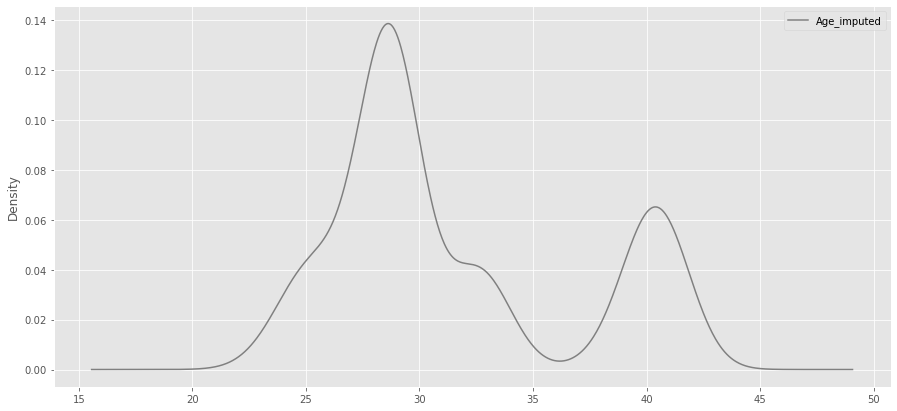

In [152]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
df.Age_imputed.plot(kind='kde', ax=ax, color='grey')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(30, 0.03, 'The best Age missing values encoding appeared to by Age imputed by Pclass')

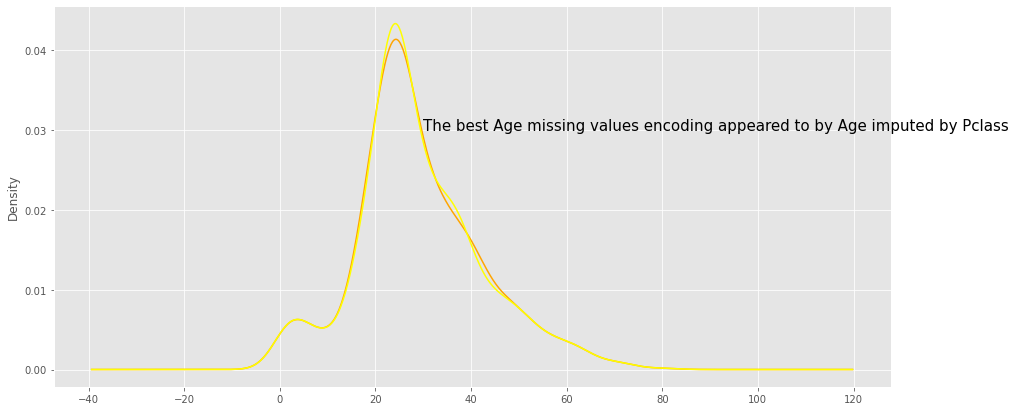

In [175]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
df['Age_Sex_Pclass'].plot(kind='kde', ax=ax, color='orange')
df.Age_Pclass.plot(kind='kde', ax=ax, color='yellow')

ax.text(30, 0.03, r'The best Age missing values encoding appeared to by Age imputed by Pclass', fontsize=15)

Conclusion:
The good plan to sucessful handle missing values would comprise the following steps:

1. Encode the numeric missing values applying the abovementioned methods.
2. Plot all graphs.
3. Opt for the one that has the most similar distribution with the original distribution of a variable.
